## Read dataframe

In [1]:
import pandas as pd

luck1 = pd.read_csv('2019-2020/luck.csv')
luck1['year'] = 2020
luck2 = pd.read_csv('2020-2021/luck.csv')
luck2['year'] = 2021
luck3 = pd.read_csv('2021-2022/luck.csv')
luck3['year'] = 2022
luck = pd.concat([luck1, luck2, luck3])
luck

,Game,Luck Index,team,year
0,1,0.0,ale,2020
1,2,2.4,ale,2020
2,3,0.3,ale,2020
3,4,0.4,ale,2020
4,5,1.6,ale,2020
...,...,...,...,...
163,26,1.2,riccardo,2022
164,27,-0.5,riccardo,2022
165,28,1.0,riccardo,2022
166,29,0.5,riccardo,2022


## Fill dataframe

In [2]:
players = luck['team'].unique()
years = luck['year'].unique()
for year in years:
    luck_by_year = luck.loc[luck['year'] == year]
    year_players = luck_by_year['team'].unique()
    games = luck_by_year['Game'].unique()
    for player in players:
        if player not in year_players:
            for game in games:
                to_append = pd.DataFrame([[game, 0.0, player, year]], columns=luck.columns)
                #luck = luck.append(to_append, ignore_index=True)
                luck = pd.concat([luck, to_append], ignore_index=True)

In [3]:
luck['new_index'] = luck['Game'] + 35 * (luck['year'] - 2020)
games = max(luck['new_index'].unique())
print(games)
luck = luck.set_index('new_index')
luck.index.name = 'index'
luck

100


,Game,Luck Index,team,year
index,,,,
1,1,0.0,ale,2020
2,2,2.4,ale,2020
3,3,0.3,ale,2020
4,4,0.4,ale,2020
5,5,1.6,ale,2020
...,...,...,...,...
96,26,0.0,giulio,2022
97,27,0.0,giulio,2022
98,28,0.0,giulio,2022


## Plot

In [8]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce

colors = ['darkorange', 'yellowgreen', 'r', 'midnightblue', 'lightskyblue', 'seagreen', 'grey', 'purple']
teamColors = {}
for i in range(len(players)):
    teamColors[players[i]] = colors[i]

def evo_plot(games, df_final, par, title, ylabel, threshold):
    '''Evolution plots'''
    gms = np.arange(0, games+1)
    fig = plt.figure(figsize=(games*0.6,6))
    data = []
    for team in players:
        df = df_final[df_final['team']==team].copy()
        df['cumsum'] = np.cumsum(df[par])
        score = df['cumsum'].loc[games]
        df['score'] = score
        data.append(df)
    data = sorted(data, key=lambda x: x['score'].unique().min(axis=0), reverse=True)
    for df in data:
        team = df['team'].unique()[0]
        color = teamColors[team]
        df = df.reindex(gms, fill_value=0) #Adding zeroes for missing games and for game number 0
        df['cumsum'] = round(np.cumsum(df[par]), 3)
        values = df['cumsum']
        score = values.loc[games]
        score_prev = values.loc[games-1]
        diff = round(score - score_prev,3)
        if diff >= 0:
            sign = '+'
        else:
            sign = ''
        p = plt.plot(gms, values, color=color, ls='-', lw=2,
                     label=str(score)+' ('+ sign + str(diff)+') | '+str(team))
        # Labels for games over threshold
        gm = df[(df[par]>threshold)|(df[par]<-threshold)].index
        dd = df[df.index.isin(gm)]
        marks = dd['cumsum']
        plt.scatter(gm, marks, edgecolor=color, facecolor=color, s=400+20*dd[par], label='')
        for x, y, text in zip(gm, marks, dd[par]):
            plt.text(x, y, text, horizontalalignment='center', verticalalignment='center', color='white')
    plt.xticks(np.arange(0, games+1))
    plt.xlim((-0.5, games+0.5))
    plt.grid(axis='x', linestyle='-', linewidth=5, alpha=0.2)
    plt.grid(axis='y', alpha=0.2)
    plt.xlabel('Matchday')
    plt.ylabel(ylabel)
    plt.title(title, fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

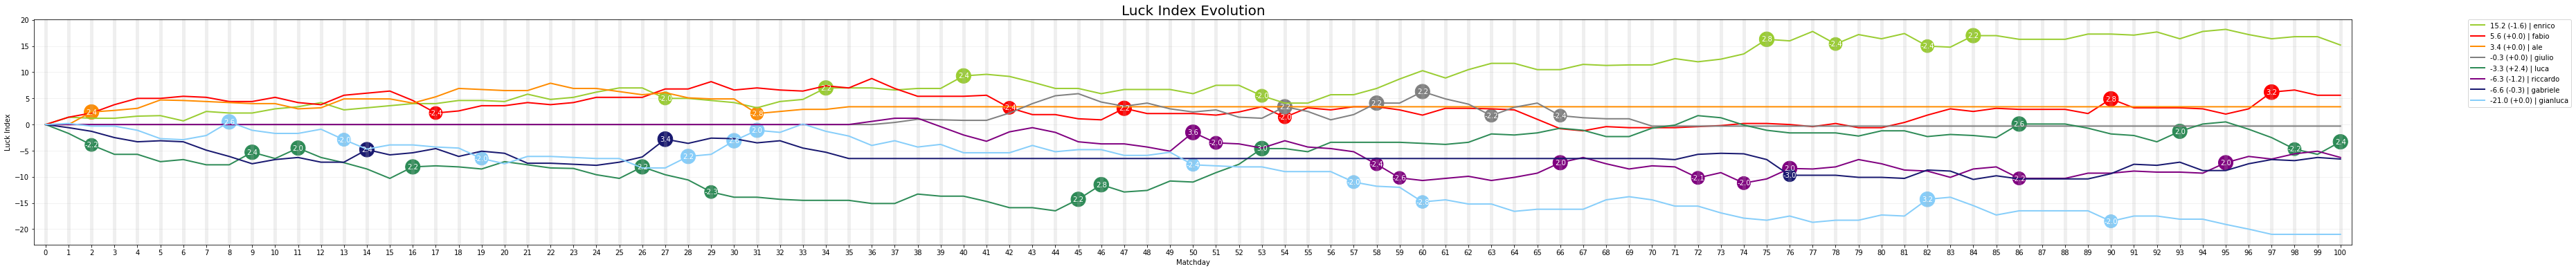

In [9]:
evo_plot(games, luck, par='Luck Index', title='Luck Index Evolution', ylabel='Luck Index', threshold=1.9)